## The example must include how to export shapes and xyz from WB

### Thing to fix before airing example:
 shoot message when tem data too far away, make example neat
 
 Also do not plot borehole legend if no boreholes are there




In [2]:
# import necessary packages
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os


sys.path.append('../src/ProfilePlotter')
import ProfilePlotter as pplotter



ttem_path = "../Examples/xyz/SCI_tTEM_smooth_MOD_inv.xyz"
stem_path_1 = "../Examples/xyz/sTEM_202308and202402_MOD_inv.xyz"
stem_path_2 = "../Examples/xyz/sTEM_202405and06_MOD_inv.xyz"
profiler_path =  "../Examples/xyz/Profiler_202406_MOD_inv.xyz"
# create model object
model = pplotter.Model()


# populate model object with dictionaries of ttem data
# dictionaries are appended into a list, importing a dataset twice will simply append it to the list.
# to remove data sets a new model object can be created

model.loadXYZ(ttem_path, mod_name='Kakuma_tTEM', model_type='tTEM')
model.loadXYZ(stem_path_1, mod_name='sTEM_202308and202402_Kakuma', model_type='sTEM')
model.loadXYZ(stem_path_2, mod_name='sTEM_202405and06_Kakuma', model_type='sTEM')
model.loadXYZ(profiler_path, mod_name='/Profiler_202406_Kakuma', model_type='profiler')

In [3]:
# get a list of all the borehole paths
borehole_paths = glob("../Examples/boreholes"+"/*.dat")

#load from .dat files
model.loadBoreholes(borehole_paths)

### Grab the .shp & .shx files for the desired Aarhus Workbench profiles from the "Maps" folder in your WorkSpace

In [ ]:

prof_coord_paths = glob('../Examples/profiles' + '/*.shp')
# profile coords are saved as a list of dictionaries
model.loadProfileCoords(prof_coord_paths)
#In this case there are 2 profiles, we'll select one of them
profile_idx = 0
#A tTEM interpolation happens with the following call
model.createProfiles(ttem_model_idx=0, profile_idx = profile_idx, interp_radius=100, model_spacing=10) 

c:\Users\au487220\OneDrive - Aarhus universitet\Documents\Repositories\ProfilePlotter\Examples\../src/ProfilePlotter\ProfilePlotter.py:304: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


x_ticks position 4: [   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000.]
Borehole 4A is 0.119 km from profile, it was included.
Borehole 4E is 0.119 km from profile, it was included.
Borehole 5B is 0.831 km from profile, it was not included.
Borehole 9 is 0.189 km from profile, it was not included.
Borehole test_drilling_2 is 0.101 km from profile, it was included.


(<Figure size 2000x633.333 with 1 Axes>,
 <Axes: title={'left': 'Borehole Legend'}>)

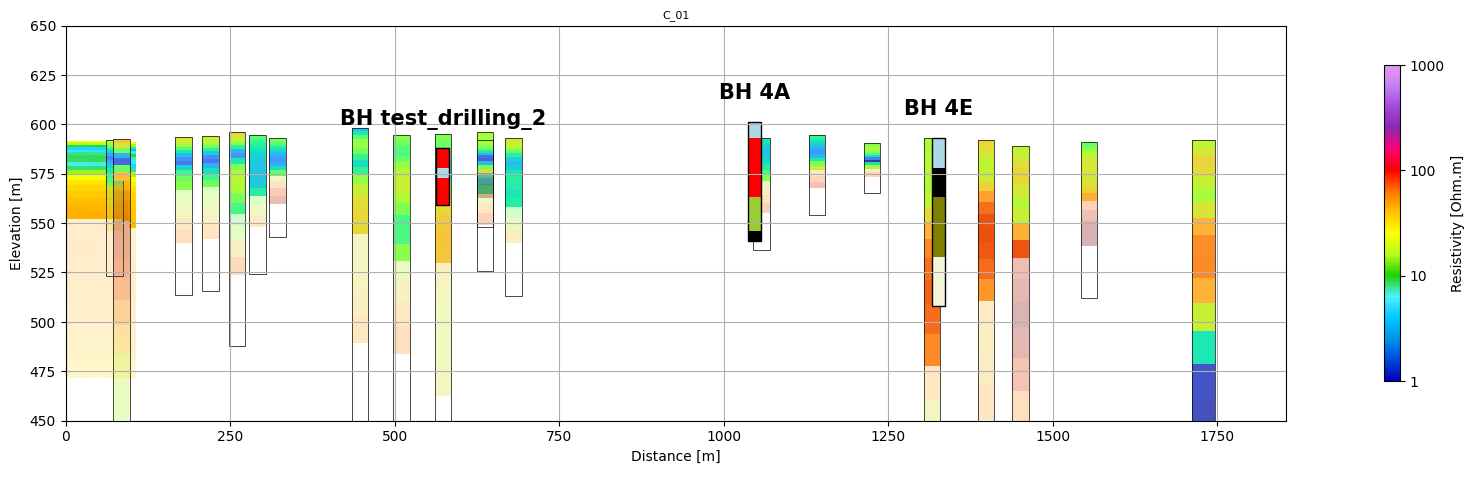

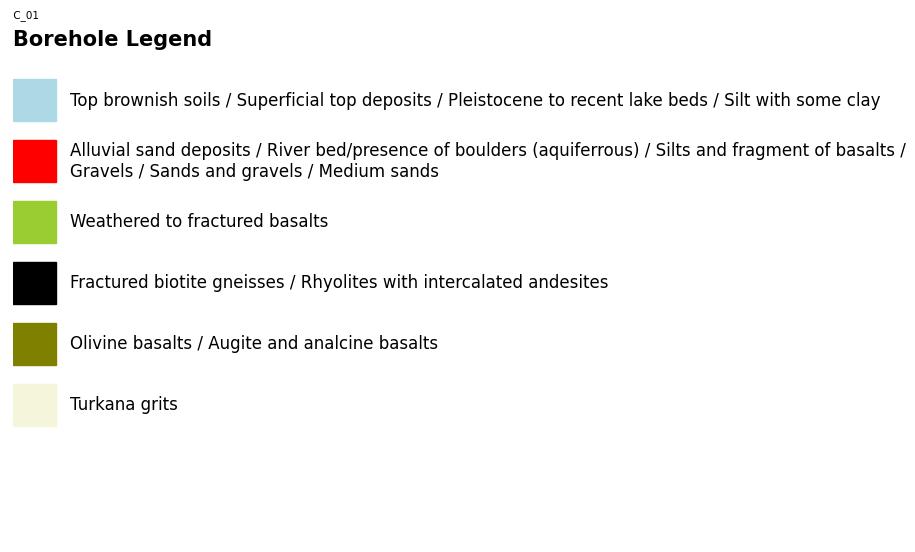

In [ ]:

# Create the plot object for the plotting of the previous models
plot = pplotter.Plot(model)
#create the axis that will be passed onto the Plot class TEMProfile method
fig, ax = plt.subplots(1, 1, figsize=(20,5))
scale = 3
vmin=1
vmax=1000
plot.TEMProfile(profile_idx=profile_idx, zmin=450, zmax=650,ax=ax , scale=scale, cbar=True, cbar_orientation='vertical', vmin=vmin, vmax=vmax)
#cbar_ax = fig.axes[-1]  # Access the last created axes, which should be the colorbar
#cbar_ax.set_position([0.75, 0.07, 0.24, 0.1])  # fits for zmin=450, zmax=650 figsize=(20,5)
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=0, search_radius=100, model_width=35, ax=ax, print_msg=False, vmax=vmax)
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=1, search_radius=100, model_width=35,ax=ax, print_msg=False, vmax=vmax)
plot.addProfilerSoundings(profile_idx=profile_idx, profiler_model_idx=0, search_radius=50, model_width=25, ax=ax, print_msg=False, vmax=vmax)
plotted_boreholes_tuple = plot.addBoreholes(profile_idx=profile_idx, ax=ax, search_radius = 150, bh_width=20 , print_msg=True, alpha=1, add_label=True,text_size=15, shift=20) #we get the plotted boreholes and the profile idx in plotted_boreholes_tuple
# Add the borehole legend as a separate image, passing the plotted boreholes
plot.addBoreholeLegend(plotted_boreholes_tuple, text_size=10, max_char=100)




(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Easting [m]', ylabel='Northing [m]'>)

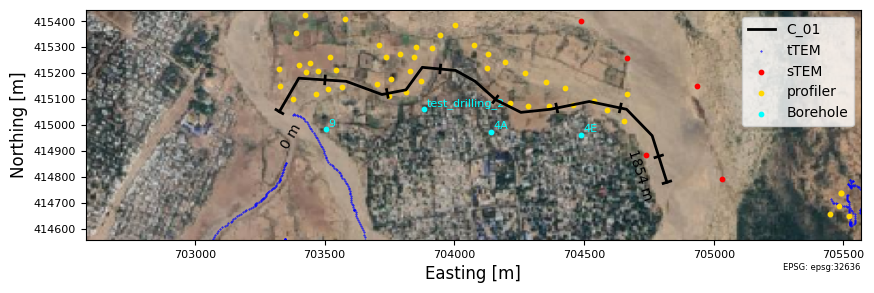

In [5]:

tif_file = '../Examples/tiff/Kakuma_EPSG_32636.tif'

plot.profileMap(profile_idx=profile_idx, buffer=0.5, ax=None, tif_file=tif_file, modeltype_1_size=0.2)

c:\Users\au487220\OneDrive - Aarhus universitet\Documents\Repositories\ProfilePlotter\Examples\../src/ProfilePlotter\ProfilePlotter.py:304: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


x_ticks position 4: [   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000.]
Borehole 4A is 1.320 km from profile, it was not included.
Borehole 4E is 0.977 km from profile, it was not included.
Borehole 5B is 1.974 km from profile, it was not included.
Borehole 9 is 1.952 km from profile, it was not included.
Borehole test_drilling_2 is 1.589 km from profile, it was not included.
No boreholes plotted for profile D_01. No legend created


(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Easting [m]', ylabel='Northing [m]'>)

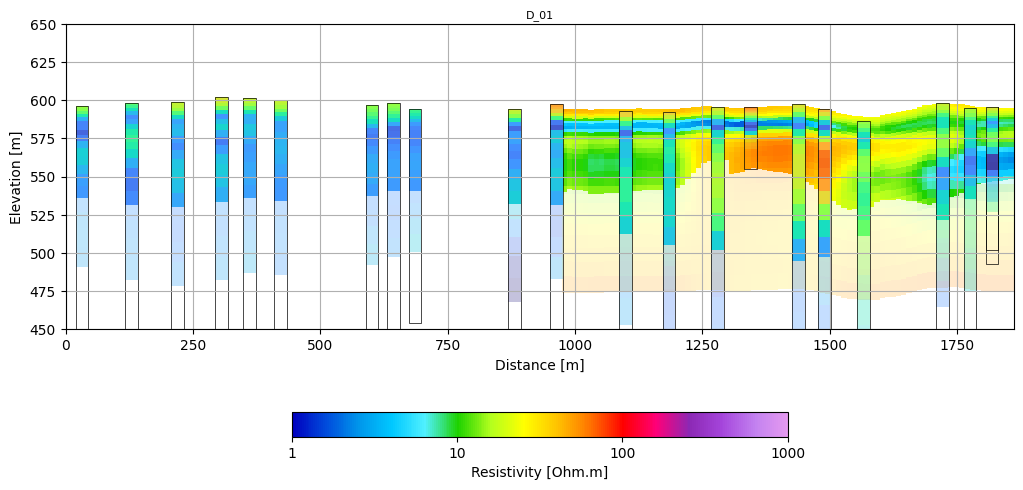

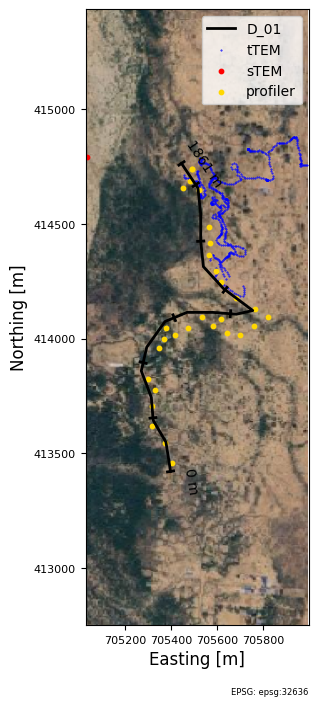

In [6]:


profile_idx = 1
model.createProfiles(ttem_model_idx=0, profile_idx = profile_idx, interp_radius=100, model_spacing=10) 

# Now we can create a plot object to plot the models
#background can be 'imagery' or 'osm'
plot = pplotter.Plot(model)

fig, ax = plt.subplots(1, 1, figsize=(20,5))
#fig  = plt.subplots(1, 1, figsize=(20,5))
scale = 3
vmin=1
vmax=1000
#plot.TEMProfile(profile_idx=profile_idx, cmap=aarhus_cmap, zmin=450, zmax=650, ax=ax, scale=scale, cbar_orientation='horizontal', vmax=vmax)
plot.TEMProfile(profile_idx=profile_idx, zmin=450, zmax=650,ax=ax , scale=scale, cbar_orientation='horizontal', vmax=vmax)
#cbar_ax = fig.axes[-1]  # Access the last created axes, which should be the colorbar
#cbar_ax.set_position([0.75, 0.07, 0.24, 0.1])  # fits for zmin=450, zmax=650 figsize=(20,5)
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=0, search_radius=100, model_width=35, ax=ax, print_msg=False, vmax=vmax)
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=1, search_radius=100, model_width=35,ax=ax, print_msg=False, vmax=vmax)
plot.addProfilerSoundings(profile_idx=profile_idx, profiler_model_idx=0, search_radius=50, model_width=25, ax=ax, print_msg=False, vmax=vmax)
plotted_boreholes_tuple = plot.addBoreholes(profile_idx=profile_idx, ax=ax, search_radius = 150, bh_width=20 , print_msg=True, alpha=1, add_label=True,text_size=15, shift=20) #we get the plotted boreholes and the profile idx in plotted_boreholes_tuple
plot.addBoreholeLegend(plotted_boreholes_tuple, text_size=10, max_char=100)

tif_file = '../Examples/tiff/Kakuma_EPSG_32636.tif'

plot.profileMap(profile_idx=profile_idx, buffer=0.5, ax=None, tif_file=tif_file, modeltype_1_size=0.2)